In [1]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from datetime import datetime, timedelta

In [2]:
#load the data from CSV file
data = pd.read_csv(r'Nat_Gas.csv')

In [3]:
data.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [5]:
data['Dates'] = pd.to_datetime(data['Dates'], yearfirst = True)

C:\Users\omgha\AppData\Local\Temp\ipykernel_2312\4253366306.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dates'] = pd.to_datetime(data['Dates'], yearfirst = True)


In [6]:
data.shape

(48, 2)

In [7]:
data.isnull().sum()

Dates     0
Prices    0
dtype: int64

In [8]:
data.describe()

,Dates,Prices
count,48,48.000000
mean,2022-10-15 08:00:00,11.207083
min,2020-10-31 00:00:00,9.840000
25%,2021-10-23 06:00:00,10.650000
50%,2022-10-15 12:00:00,11.300000
75%,2023-10-07 18:00:00,11.625000
max,2024-09-30 00:00:00,12.800000
std,NaN,0.757897


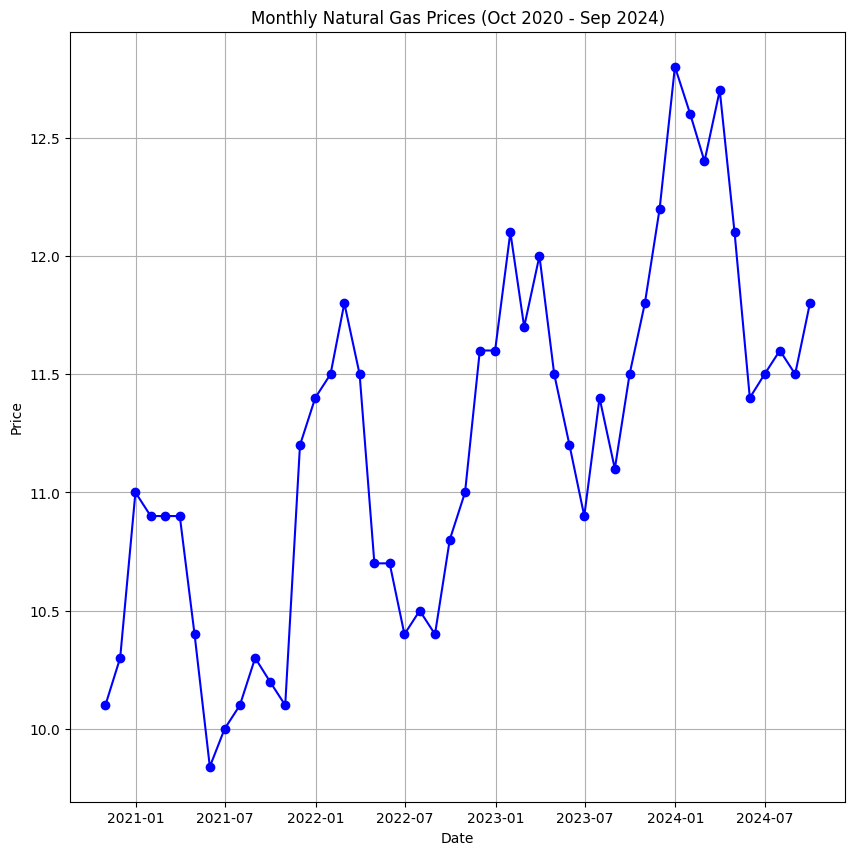

In [9]:
# Visualize the data
plt.figure(figsize=(10, 10))
plt.plot(data['Dates'], data['Prices'], marker='o', linestyle='-', color='b')
plt.title('Monthly Natural Gas Prices (Oct 2020 - Sep 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [10]:
# Prepare data for linear regression
data['DaysSinceStart'] = (data['Dates'] - data['Dates'].min()).dt.days
X = data[['DaysSinceStart']]
y = data['Prices']

In [11]:
X.head()

,DaysSinceStart
0,0
1,30
2,61
3,92
4,120


In [12]:
data.head()

,Dates,Prices,DaysSinceStart
0,2020-10-31,10.1,0
1,2020-11-30,10.3,30
2,2020-12-31,11.0,61
3,2021-01-31,10.9,92
4,2021-02-28,10.9,120


In [13]:
# Perform linear regression to estimate the price trend
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
# Extrapolate prices for the next year
future_dates = pd.date_range(data['Dates'].max() + timedelta(days=1), periods=12, freq='M')
future_days = (future_dates - data['Dates'].min()).days.values.reshape(-1, 1)
future_prices = model.predict(future_days)

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
# Function to estimate price for any given date
def estimate_price(input_date):
    days_since_start = (input_date - data['Dates'].min()).days
    estimated_price = model.predict([[days_since_start]])[0]
    return estimated_price

In [16]:
# Example: Estimate price for a specific date
input_date = datetime(2023, 6, 15)
estimated_price = estimate_price(input_date)
print(f'Estimated price for {input_date.date()}: ${estimated_price:.2f}')

Estimated price for 2023-06-15: $11.52


C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


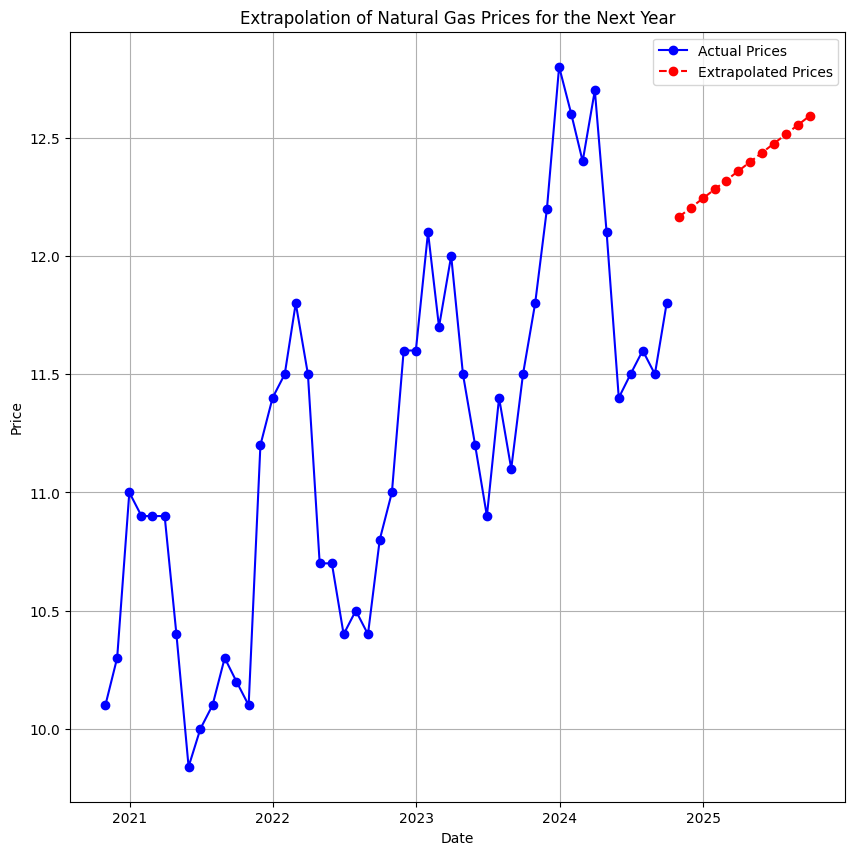

In [17]:
# Visualize the extrapolation
plt.figure(figsize=(10, 10))
plt.plot(data['Dates'], data['Prices'], marker='o', linestyle='-', color='b', label='Actual Prices')
plt.plot(future_dates, future_prices, marker='o', linestyle='--', color='r', label='Extrapolated Prices')
plt.title('Extrapolation of Natural Gas Prices for the Next Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()